# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_path = "C:/Users/eliza/ICT/ML/2/mlbootcamp5_train.csv"
df = pd.read_csv(file_path,
                 sep=";",
                 index_col="id")
print(df.head())

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

Количество после очистки: (62644, 12)

Точность GaussianNB на количественных признаках: 0.7095
Матрица неточностей без нормализации


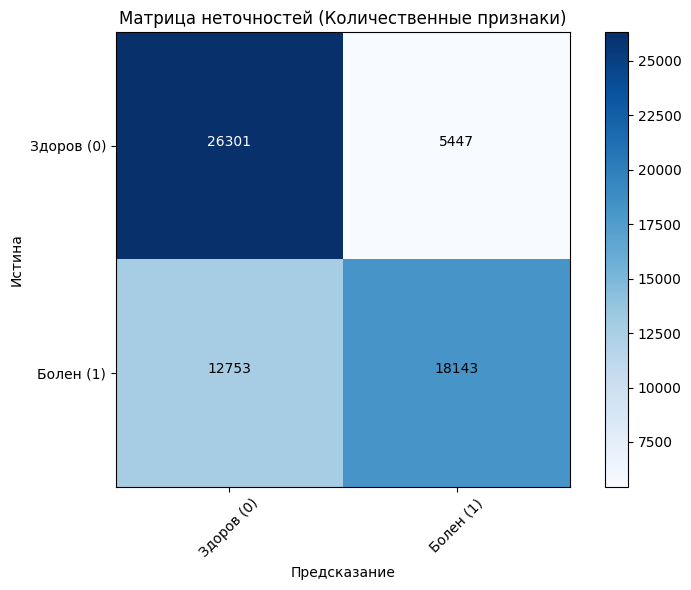

Нормализованная матрица неточностей


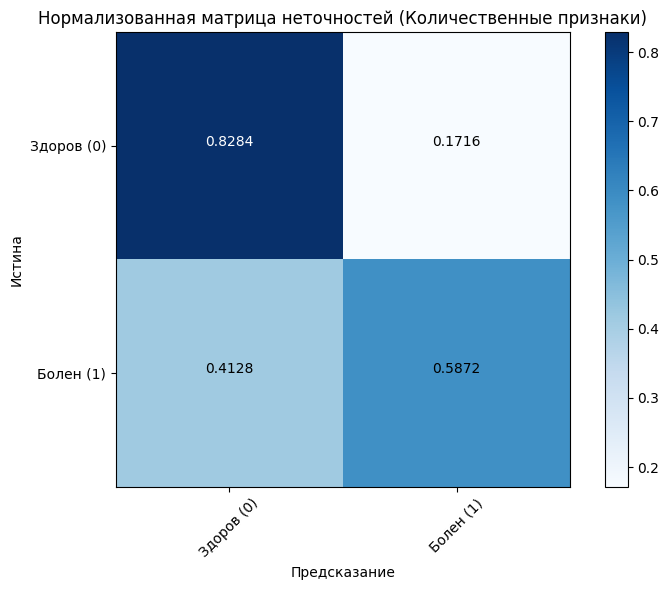

In [8]:
#Выборка количественных признаков и целевой переменной
quantitative_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
target = 'cardio'
###############Подготовка и очистка данных###########
#Давление ap_hi должно быть больше ap_lo
df.drop(df[df['ap_hi'] < df['ap_lo']].index, inplace=True)

#Берем границы давления как в лекции
df.drop(df[df['ap_hi'] < 50].index, inplace=True)
df.drop(df[df['ap_hi'] > 200].index, inplace=True)
df.drop(df[df['ap_lo'] < 50].index, inplace=True)
df.drop(df[df['ap_lo'] > 200].index, inplace=True)

#Убираем нереалистичный рост и вес 
df.drop(df[df['height'] < df['height'].quantile(0.025)].index, inplace=True)
df.drop(df[df['height'] > df['height'].quantile(0.975)].index, inplace=True)
df.drop(df[df['weight'] < df['weight'].quantile(0.025)].index, inplace=True)
df.drop(df[df['weight'] > df['weight'].quantile(0.975)].index, inplace=True)
print("Количество после очистки:", df.shape)

#Выбираем данные для модели
X_quant = df[quantitative_features]
y = df[target]

#################Классификация с использованием GaussianNB##############
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

#Создаем и обучаем модель
gnb_quant = GaussianNB()
model_quant = gnb_quant.fit(X_quant, y)

#Делаем предсказание на обучающей выборке
predict_quant = model_quant.predict(X_quant)

#####################Матрица ошибок###############################
cnf_matrix_quant = confusion_matrix(y, predict_quant)
#Точность -??????
accuracy_quant = accuracy_score(y, predict_quant)
print(f"\nТочность GaussianNB на количественных признаках: {accuracy_quant:.4f}")
############################## Визуализация матрицы ошибок############################
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Нормализованная матрица неточностей")
    else:
        print('Матрица неточностей без нормализации')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3. # Подбираем порог для цвета текста
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

class_names = ["Здоров (0)", "Болен (1)"]
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_quant, classes=class_names,
                      title='Матрица неточностей (Количественные признаки)')
plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_quant, classes=class_names, normalize=True,
                      title='Нормализованная матрица неточностей (Количественные признаки)')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**


Точность своего NB на категориальных признаках: 0.5908
Матрица неточностей без нормализации


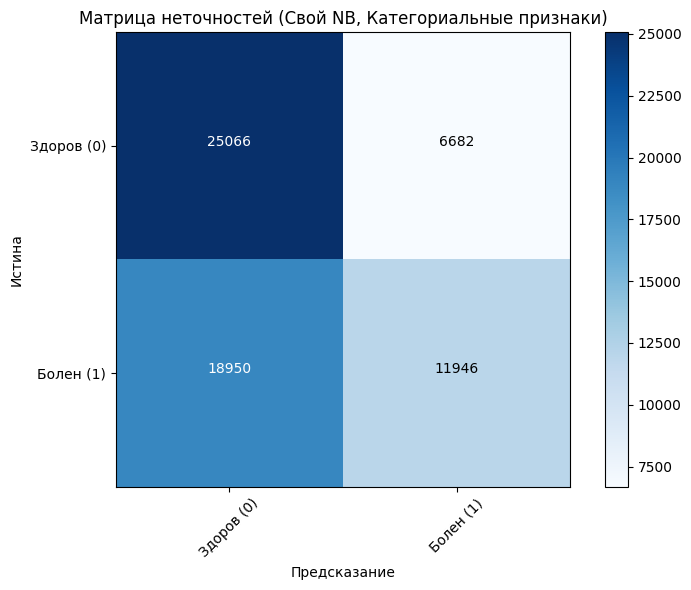


Точность sklearn CategoricalNB на категориальных признаках: 0.5908
Матрица неточностей без нормализации


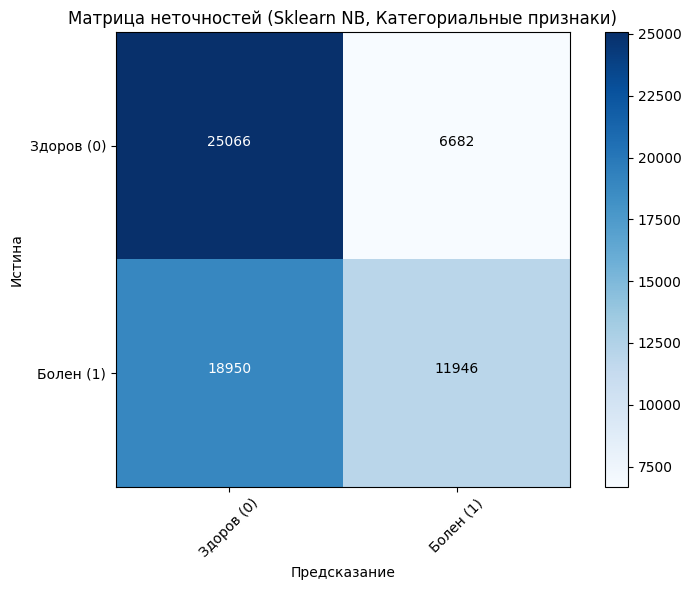

In [9]:
#Выбор категориальных признаков и целевой переменной
categorical_features = ['cholesterol', 'gluc']
X_cat = df[categorical_features]
# y = df[target] # y уже определен

class MyCategoricalNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_priors_ = None
        self.feature_probs_ = None
        self.classes_ = None
        self.n_features_ = None
        self.feature_categories_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_samples, self.n_features_ = X.shape

#Считаем априорные вероятности классов P(Ck)
        self.class_priors_ = np.zeros(n_classes)
        for i, c in enumerate(self.classes_):
            self.class_priors_[i] = np.sum(y == c) / n_samples

#Считаем условные вероятности признаков P(xi | Ck)
        self.feature_probs_ = {}
        self.feature_categories_ = {}
        for feature_idx in range(self.n_features_):
            feature_name = X.columns[feature_idx]
            categories = np.unique(X[feature_name])
            self.feature_categories_[feature_name] = categories
            self.feature_probs_[feature_name] = {}
            for c in self.classes_:
                X_c = X[y == c]
                counts = {}
                total_in_class = len(X_c)
                for category in categories:
#Применить сглаживание Лапласа
                    counts[category] = (np.sum(X_c[feature_name] == category) + self.alpha) / \
                                       (total_in_class + self.alpha * len(categories))
                self.feature_probs_[feature_name][c] = counts

        return self

    def _predict_log_proba_single(self, x):
        log_probas = {}
        for i, c in enumerate(self.classes_):
            log_proba = np.log(self.class_priors_[i])
            for feature_idx in range(self.n_features_):
                feature_name = x.index[feature_idx] 
                feature_value = x.iloc[feature_idx]
                
                if feature_value in self.feature_probs_[feature_name][c]:
                   log_proba += np.log(self.feature_probs_[feature_name][c][feature_value])
                else:
                   num_categories = len(self.feature_categories_[feature_name])
                   log_proba += np.log(self.alpha / (np.sum(y == c) + self.alpha * num_categories))


            log_probas[c] = log_proba
        return log_probas

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            log_probas = self._predict_log_proba_single(X.iloc[i])
            #Выбираем класс с максимальной лог-вероятностью
            predicted_class = max(log_probas, key=log_probas.get)
            predictions.append(predicted_class)
        return np.array(predictions)

my_nb_cat = MyCategoricalNB(alpha=1.0) 
my_nb_cat.fit(X_cat, y)
predict_cat_my = my_nb_cat.predict(X_cat)

##Оценивание
cnf_matrix_cat_my = confusion_matrix(y, predict_cat_my)
accuracy_cat_my = accuracy_score(y, predict_cat_my)
print(f"\nТочность своего NB на категориальных признаках: {accuracy_cat_my:.4f}")

#Визуализация
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_cat_my, classes=class_names,
                      title='Матрица неточностей (Свой NB, Категориальные признаки)')
plt.show()

######Сравнение с CategoricalNB из sklearn#######
from sklearn.naive_bayes import CategoricalNB

cnb_cat = CategoricalNB()
cnb_cat.fit(X_cat, y)
predict_cat_sklearn = cnb_cat.predict(X_cat)

cnf_matrix_cat_sklearn = confusion_matrix(y, predict_cat_sklearn)
accuracy_cat_sklearn = accuracy_score(y, predict_cat_sklearn)
print(f"\nТочность sklearn CategoricalNB на категориальных признаках: {accuracy_cat_sklearn:.4f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_cat_sklearn, classes=class_names,
                      title='Матрица неточностей (Sklearn NB, Категориальные признаки)')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**


Точность BernoulliNB на бинарных признаках: 0.5180
Матрица неточностей без нормализации


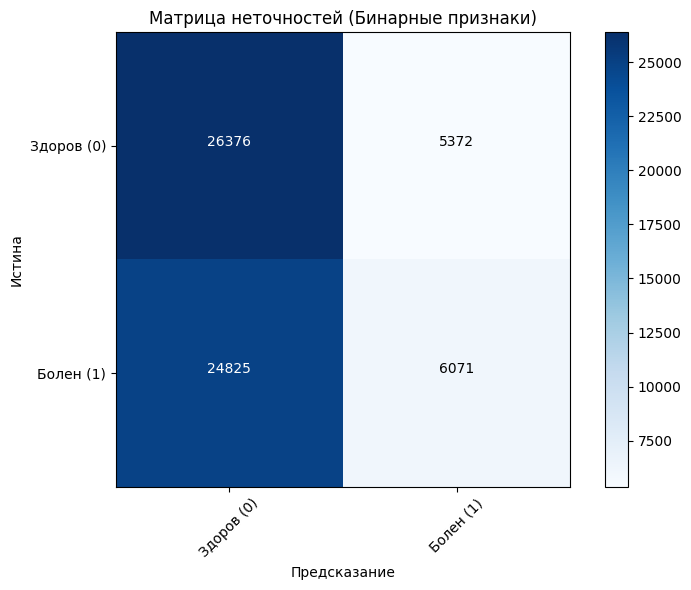

In [10]:
#Выбираем бинарные признаки
binary_features = ['gender', 'smoke', 'alco', 'active']
X_bin = df[binary_features]
# y = df[target] # y уже определен

##############Классификация с использованием Bernoulli###############
from sklearn.naive_bayes import BernoulliNB

###Модель###
bnb_bin = BernoulliNB() # alpha=1.0 и binarize=0.0 по умолчанию подходят
model_bin = bnb_bin.fit(X_bin, y)

#Делаем предсказание
predict_bin = model_bin.predict(X_bin)

cnf_matrix_bin = confusion_matrix(y, predict_bin)
accuracy_bin = accuracy_score(y, predict_bin)
print(f"\nТочность BernoulliNB на бинарных признаках: {accuracy_bin:.4f}")

# Визуализация
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_bin, classes=class_names,
                      title='Матрица неточностей (Бинарные признаки)')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

Точность объединенного классификатора (голосование): 0.6237
Матрица неточностей без нормализации


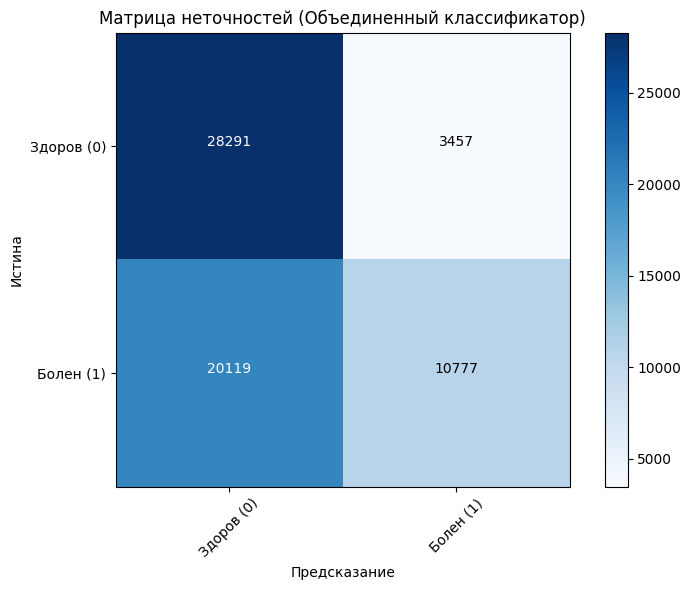

In [11]:
# Создание списка для итоговый предсказаний
final_predictions = []

#Длина у всех предсказаний одинаковая
for i in range(len(predict_quant)):
    #Берем голоса от каждого классификатора для i-го пациента
    vote_quant = predict_quant[i]
    vote_cat = predict_cat_my[i]
    vote_bin = predict_bin[i]

    #Считаем сумму голосов. Если 1 - болен, 0 - здоров.
    # Если сумма > 1, значит, как минимум два классификатора проголосовали за "1" (болен)
    sum_of_votes = vote_quant + vote_cat + vote_bin

    if sum_of_votes > 1:
        final_verdict = 1
    else:
        final_verdict = 0

    #Добавляем результат в итоговый список
    final_predictions.append(final_verdict)

#Превратим список в numpy-массив, чтобы метрики посчитать
final_predictions = np.array(final_predictions)

#Матрица + неточность
cnf_matrix_final = confusion_matrix(y, final_predictions)
accuracy_final = accuracy_score(y, final_predictions)

print(f"Точность объединенного классификатора (голосование): {accuracy_final:.4f}")

#PLOT
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix_final, classes=class_names,
                      title='Матрица неточностей (Объединенный классификатор)')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [3]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.